### Importação dos dados



In [703]:
import pandas as pd
import matplotlib

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento


In [677]:
def faturamento_loja(loja):
    faturamento = sum(loja["Preço"])
    return faturamento

In [704]:
lojas = [loja, loja2, loja3, loja4]
nome_loja= [f"Loja {i+1}" for i in range(len(lojas))]

faturamento = {"Faturamento":[faturamento_loja(loja) for loja in lojas]}
faturamento_lojas = pd.DataFrame(data=faturamento, index=nome_loja)
faturamento_lojas

,Faturamento
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


# 2. Vendas por Categoria


Neste passo, deve calcular a **quantidade de produtos vendidos por categoria** em cada loja. A ideia é agrupar os dados por categoria e contar o número de vendas de cada tipo, **mostrando** **as categoria mais populares** de cada loja

In [679]:
def vendas_categoria(loja):
    categorias = loja['Categoria do Produto']
    vendas = {}
    for categoria in categorias:
        if categoria in vendas:
            vendas[categoria] += 1
        else:
            vendas[categoria] = 1
    vendas = list(vendas.items())
    vendas.sort(key=lambda x: x[1], reverse=True)
    return vendas


In [680]:
vendas_por_categoria = [vendas_categoria(loja) for loja in lojas]

df_categorias = pd.DataFrame(vendas_por_categoria, index=nome_loja)
df_categorias.T

,Loja 1,Loja 2,Loja 3,Loja 4
0,"(moveis, 465)","(moveis, 442)","(moveis, 499)","(moveis, 480)"
1,"(eletronicos, 448)","(eletronicos, 422)","(eletronicos, 451)","(eletronicos, 451)"
2,"(brinquedos, 324)","(brinquedos, 313)","(brinquedos, 315)","(brinquedos, 338)"
3,"(eletrodomesticos, 312)","(eletrodomesticos, 305)","(eletrodomesticos, 278)","(esporte e lazer, 277)"
4,"(esporte e lazer, 284)","(esporte e lazer, 275)","(esporte e lazer, 277)","(eletrodomesticos, 254)"
5,"(instrumentos musicais, 182)","(instrumentos musicais, 224)","(livros, 185)","(utilidades domesticas, 201)"
6,"(livros, 173)","(livros, 197)","(instrumentos musicais, 177)","(livros, 187)"
7,"(utilidades domesticas, 171)","(utilidades domesticas, 181)","(utilidades domesticas, 177)","(instrumentos musicais, 170)"


# 3. Média de Avaliação das Lojas

In [681]:
def calcular_media(loja):
    media = sum(loja['Avaliação da compra']) / len(loja)
    return int(media * 100) / 100

calcular_media(loja)

3.97

In [682]:
media_lojas = []
for loja in lojas:
    media = calcular_media(loja)
    media_lojas.append(media)

avaliacao = pd.DataFrame(columns=["Média de avaliação"], data = media_lojas, index=nome_loja)
avaliacao

,Média de avaliação
Loja 1,3.97
Loja 2,4.03
Loja 3,4.04
Loja 4,3.99


# 4. Produtos Mais e Menos Vendidos

In [683]:
def produtos_mais_vendidos(loja):
    produtos = loja['Produto']
    vendas = {}
    for produto in produtos:
        if produto in vendas:
            vendas[produto] += 1
        else:
            vendas[produto] = 1
    vendas = list(vendas.items())
    vendas.sort(key=lambda x: x[1], reverse=True)
    mais_vendido = vendas[0]
    menos_vendido = vendas[-1]
    return mais_vendido, menos_vendido

In [684]:
from matplotlib import pyplot as plt


prod_mais_vendidos = []
prod_menos_vendidos = []

for loja in lojas:
    mais_vendido, menos_vendido,  = produtos_mais_vendidos(loja)
    prod_mais_vendidos.append(mais_vendido)
    prod_menos_vendidos.append(menos_vendido)



analise_produtos = pd.DataFrame({'Mais vendido': prod_mais_vendidos,
                                 'Menos vendido':prod_menos_vendidos},
                                index=nome_loja)
analise_produtos

,Mais vendido,Menos vendido
Loja 1,"(Micro-ondas, 60)","(Celular ABXY, 33)"
Loja 2,"(Iniciando em programação, 65)","(Jogo de tabuleiro, 32)"
Loja 3,"(Kit banquetas, 57)","(Blocos de montar, 35)"
Loja 4,"(Cama box, 62)","(Guitarra, 33)"


# 5. Frete Médio por Loja

In [686]:
def calcular_frete(loja):
    frete_media = sum(loja['Frete']) / len(loja)
    return round(frete_media, 2)

In [687]:
frete_dados = [calcular_frete(loja) for loja in lojas]

df_frete = pd.DataFrame({'Frete Médio':frete_dados}, index=nome_loja)
df_frete

,Frete Médio
Loja 1,34.69
Loja 2,33.62
Loja 3,33.07
Loja 4,31.28


# Gráficos

## Faturamento

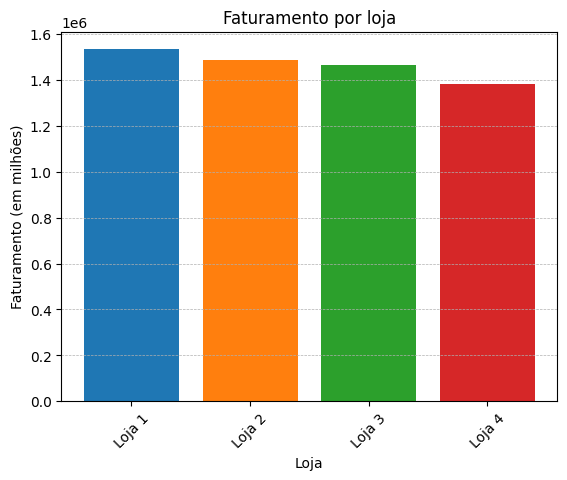

In [688]:
plt.bar(faturamento_lojas.index, faturamento_lojas['Faturamento'], color=['tab:blue','tab:orange','tab:green','tab:red'])
plt.xticks(rotation=45)
plt.title('Faturamento por loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (em milhões)')
plt.ylim()
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.show()

## Vendas por categoria

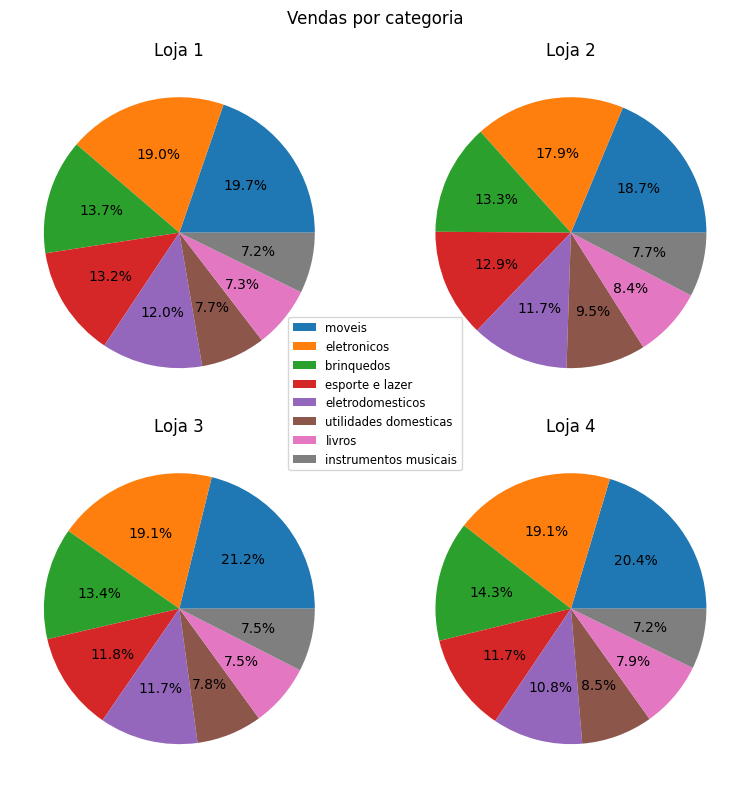

In [689]:
## Gráfico de Pizza para as categorias

from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Vendas por categoria')
for i in range(len(lojas)):
    ax = axs[i // 2, i % 2]
    categorias = [categoria[0] for categoria in vendas_por_categoria[i]]
    valores = [categoria[1] for categoria in vendas_por_categoria[i]]
    ax.pie(valores, autopct='%1.1f%%')
    ax.set_title(f'{nome_loja[i]}')

fig.legend(categorias, loc='center', fontsize="small")
fig.tight_layout()
plt.show()

## Média de avaliação

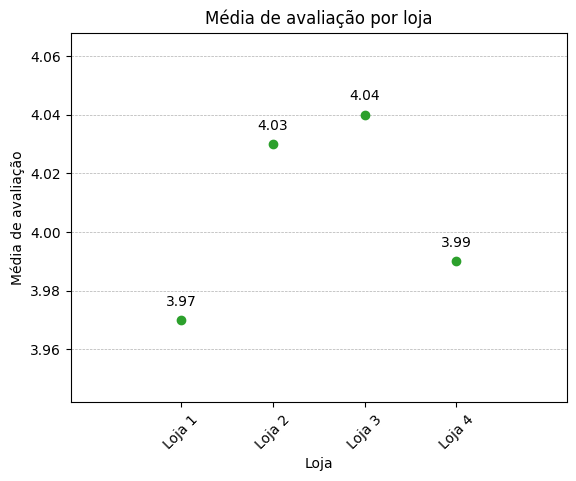

In [690]:
plt.plot(avaliacao.index, avaliacao['Média de avaliação'], marker='o', linestyle='none', color='tab:green')
plt.xticks(rotation=45)
plt.title('Média de avaliação por loja')
plt.xlabel('Loja')
plt.ylabel('Média de avaliação')
plt.margins(tight=True, y=.4, x=.4)
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)

for i, valor in enumerate(avaliacao['Média de avaliação']):
    plt.text(i, valor + .005, str(valor), ha="center")

plt.show()

## Produtos mais e menos vendidos

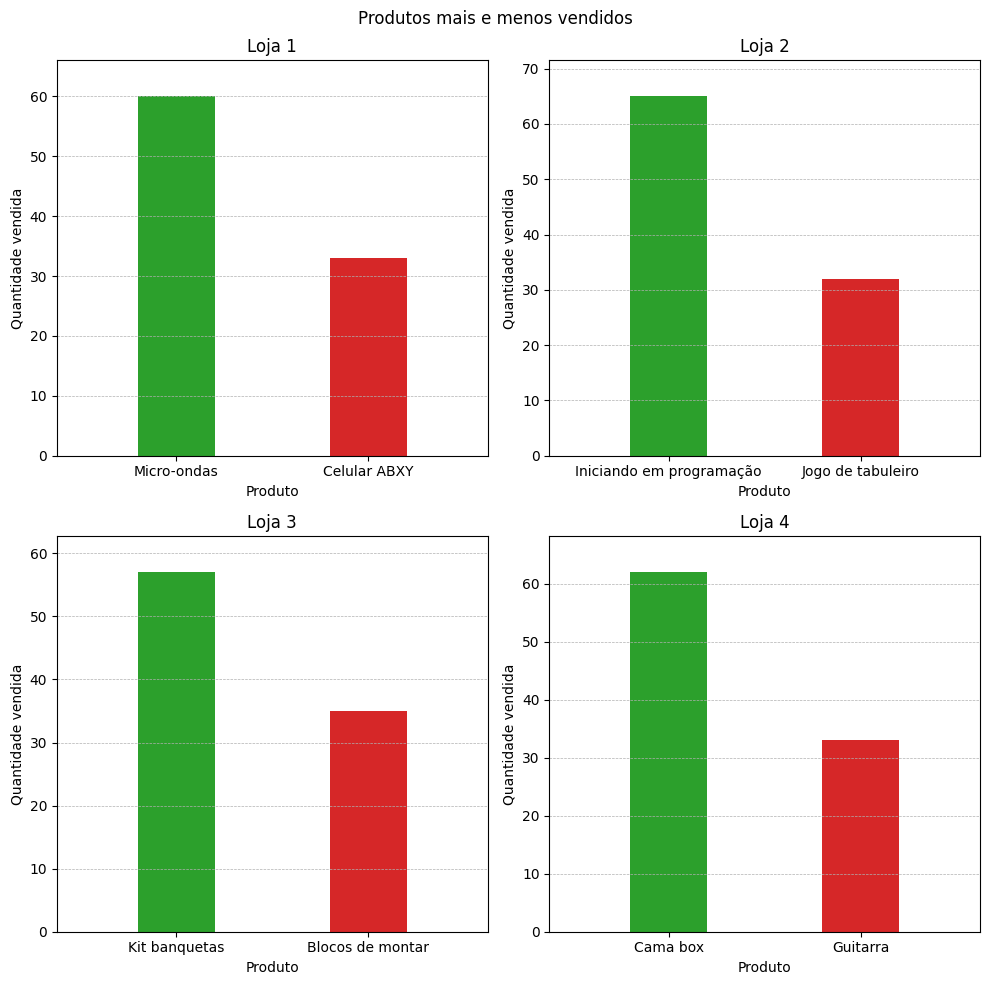

In [691]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Produtos mais e menos vendidos')
for i in range(len(lojas)):
    ax = axs[i // 2, i % 2]
    mais_vendido = [analise_produtos.iloc[i, 0][0]]
    menos_vendido = [analise_produtos.iloc[i, 1][0]]
    ax.bar(mais_vendido, [analise_produtos.iloc[i, 0][1]], color='tab:green',  width=.4)
    ax.bar(menos_vendido, [analise_produtos.iloc[i, 1][1]], color='tab:red', width=.4)
    ax.set_title(f'{nome_loja[i]}')
    ax.set_xlabel('Produto')
    ax.set_ylabel('Quantidade vendida')
    ax.grid(axis='y', which='both', linestyle='--', linewidth=0.5)

    ax.margins(tight=True, y=.10, x=.3)

fig.tight_layout()
plt.show()

## Frete médio por loja

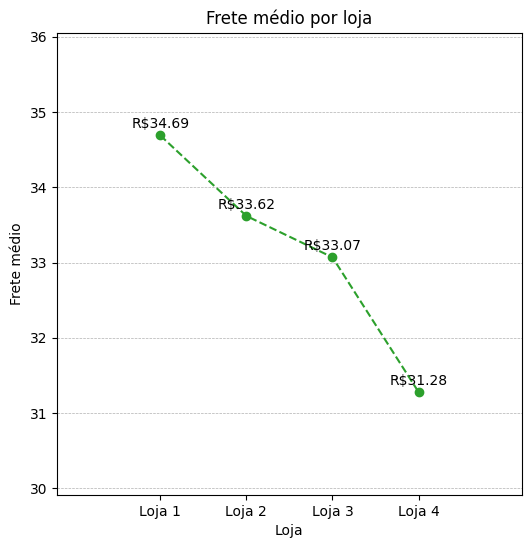

In [701]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(df_frete.index, df_frete['Frete Médio'], marker='o', linestyle='--', color='tab:green')
ax.set_title('Frete médio por loja')
ax.set_xlabel('Loja')
ax.set_ylabel('Frete médio')
ax.margins(tight=True, y=.4, x=.4)
ax.grid(axis='y', which='both', linestyle='--', linewidth=0.5)

for i, valor in enumerate(df_frete['Frete Médio']):
    ax.text(i, valor + .1, str(f'R${valor}'), ha="center")

plt.show()
